In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#Please find the most suitable variable for the Boston dataset for predicting the house prices via correlation. Which would be the most relevant feature and why?
correlation_matrix = df.corr()
correlations_with_prices = correlation_matrix['medv'].sort_values(ascending=False)
most_relevant_feature = correlations_with_prices.index[1]  # The index 0 is 'MEDV' itself, so we skip it.

print("The most relevant feature for predicting house prices is:", most_relevant_feature)
print("Correlation coefficient with house prices:", correlations_with_prices[1])

The most relevant feature for predicting house prices is: rm
Correlation coefficient with house prices: 0.6953599470715401


<Axes: xlabel='rm', ylabel='medv'>

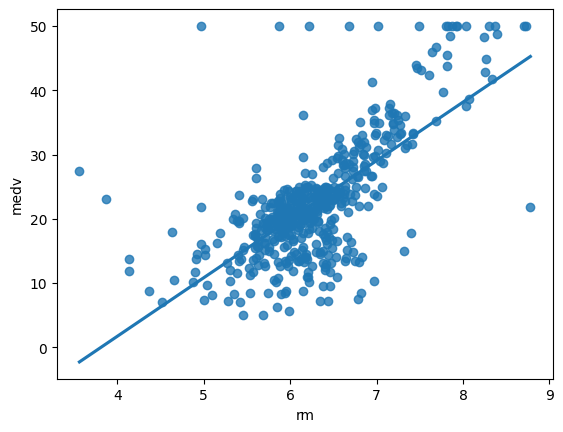

In [ ]:
sns.regplot(x = "rm",y = "medv",ci = None,data = df)

In [ ]:
#Please use this variable (you have decided in Part-A) to provide a basic regression model (one feature and one label) and then please discuss about your model.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[[most_relevant_feature]]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)









Mean Squared Error (MSE): 46.144775347317264
R-squared (R2) Score: 0.3707569232254778


In [ ]:
# Please use several variables for predicting the house prices via OLS Regression and then discuss about your model via the obtained metrics.
# Assume 'X' contains multiple relevant features and 'y' is the target variable ('MEDV')
X = df[['zn', 'indus', 'nox']]
y = df['medv']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the OLS Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 49.59021815665269
R-squared (R2) Score: 0.3237739003831547
